In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

%matplotlib inline

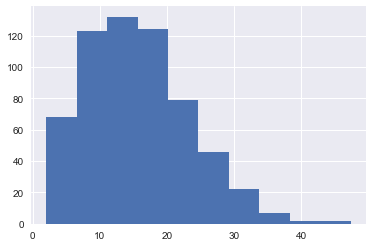

In [2]:
df_per = pd.read_csv("../csv/city_pov_2016_perc.csv", encoding="latin-1")
df_per.rename(columns={'Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people': 'Per_below_pov'}, inplace=True)
df_per.loc[df_per['Per_below_pov'] <= 13, "is_poor"] = 1
df_per.loc[df_per['Per_below_pov'] > 13, "is_poor"] = 0
df_per = df_per.replace("N", np.nan)
df_per = df_per.fillna('0')
df_per['Per_below_pov'].hist()

In [3]:
df_per.columns

Index(['Id', 'Id2', 'Geography',
       'Percent; EMPLOYMENT STATUS - Civilian labor force - Unemployment Rate',
       'Percent; OCCUPATION - Civilian employed population 16 years and over - Management, business, science, and arts occupations',
       'Percent; OCCUPATION - Civilian employed population 16 years and over - Service occupations',
       'Percent; OCCUPATION - Civilian employed population 16 years and over - Sales and office occupations',
       'Percent; OCCUPATION - Civilian employed population 16 years and over - Natural resources, construction, and maintenance occupations',
       'Percent; OCCUPATION - Civilian employed population 16 years and over - Production, transportation, and material moving occupations',
       'Percent; INDUSTRY - Civilian employed population 16 years and over',
       'Percent; INDUSTRY - Civilian employed population 16 years and over - Agriculture, forestry, fishing and hunting, and mining',
       'Percent; INDUSTRY - Civilian employed pop

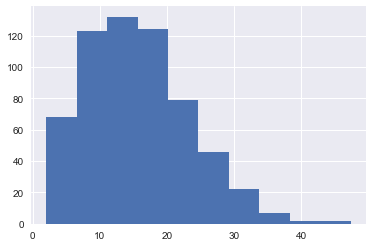

In [4]:
df_est = pd.read_csv("../csv/city_pov_2016_est.csv", encoding="latin-1")
df_est.rename(columns={'Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people': 'Per_below_pov'}, inplace=True)
df_est.loc[df_est['Per_below_pov'] <= 13, "is_poor"] = 1
df_est.loc[df_est['Per_below_pov'] > 13, "is_poor"] = 0
df_est = df_est.replace("N", np.nan)
df_est = df_est.fillna('0')
df_est['Per_below_pov'].hist()

Models using Percentage CSV
=============

In [5]:
target = df_per["is_poor"]
target_names = ["poorer", "wealthier"]
data = df_per.drop(["is_poor", 
                'Geography', 
                'Id', 
                'Id2',
                
               ], axis=1)
feature_names = data.columns

svc

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=32)
svc_model = SVC(kernel='linear')

In [7]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
print('Test Acc: %.3f' % svc_model.score(X_test, y_test))
MSE_svc = mean_squared_error(y_test, svc_model.predict(X_test))  
print(f"MSE: {MSE_svc}")

Test Acc: 0.895
MSE: 0.10526315789473684


In [9]:
predictions = svc_model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

     poorer       0.94      0.88      0.91        95
  wealthier       0.83      0.91      0.87        57

avg / total       0.90      0.89      0.90       152



In [10]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
svc2_model = SVC(kernel='linear')

In [12]:
svc2_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
print('Test Acc: %.3f' % svc2_model.score(X_test_scaled, y_test))

Test Acc: 0.980


In [14]:
MSE_svc = mean_squared_error(y_test, svc2_model.predict(X_test_scaled))  
print(f"MSE: {MSE_svc}")

MSE: 0.019736842105263157


In [15]:
predictions = svc2_model.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

     poorer       0.98      0.99      0.98        95
  wealthier       0.98      0.96      0.97        57

avg / total       0.98      0.98      0.98       152



rando forest

In [16]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(data, target, random_state=32)

In [17]:
rf = RandomForestClassifier(n_estimators=100)

In [18]:
X_scaler_rf = StandardScaler().fit(X_train_rf)
X_train_scaled_rf = X_scaler_rf.transform(X_train_rf)
X_test_scaled_rf = X_scaler_rf.transform(X_test_rf)

In [19]:
rf.fit(X_train_scaled_rf, y_train_rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [20]:
rf.score(X_test_scaled_rf, y_test_rf)

0.993421052631579

In [21]:
predictions = rf.predict(X_test_scaled_rf)
print(classification_report(y_test_rf, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

     poorer       0.99      1.00      0.99        95
  wealthier       1.00      0.98      0.99        57

avg / total       0.99      0.99      0.99       152



In [22]:
MSE_rf = mean_squared_error(y_test_rf, rf.predict(X_test))  
print(f"MSE: {MSE_rf}")

MSE: 0.375


In [23]:
print('Test Acc: %.3f' % rf.score(X_test_scaled_rf, y_test_rf))

Test Acc: 0.993


xgb boost

In [24]:
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(data, target, random_state=32)

In [25]:
xgb_model = XGBClassifier()
X_scaler_x = StandardScaler().fit(X_train_x)
X_train_scaled_x = X_scaler_x.transform(X_train_x)
X_test_scaled_x = X_scaler_x.transform(X_test_x)

In [26]:
xgb_model.fit(X_train_scaled_x, y_train_x)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [27]:
y_pred = xgb_model.predict(X_test_scaled_x)
predictions = [round(value) for value in y_pred]

/Users/jayklein95/anaconda/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [28]:
accuracy = accuracy_score(y_test_x, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [29]:
predictions = xgb_model.predict(X_test_scaled_x)
print(classification_report(y_test_x, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

     poorer       1.00      1.00      1.00        95
  wealthier       1.00      1.00      1.00        57

avg / total       1.00      1.00      1.00       152



/Users/jayklein95/anaconda/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


logistic 

In [30]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(data, target, random_state=32)
X_scaler_lr = StandardScaler().fit(X_train_lr)
X_train_scaled_lr = X_scaler_lr.transform(X_train_lr)
X_test_scaled_lr = X_scaler_lr.transform(X_test_lr)

In [31]:
lrc = LogisticRegression()

In [32]:
lrc.fit(X_train_scaled_lr, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
print('Test Acc: %.3f' % lrc.score(X_test_scaled_lr, y_test_lr))

Test Acc: 0.954


In [34]:
predictions = lrc.predict(X_test_scaled_lr)
print(classification_report(y_test_lr, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

     poorer       0.98      0.95      0.96        95
  wealthier       0.92      0.96      0.94        57

avg / total       0.96      0.95      0.95       152



KNN

In [35]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(data, target, random_state=32)
X_scaler_knn = StandardScaler().fit(X_train_knn)
X_train_scaled_knn = X_scaler_knn.transform(X_train_knn)
X_test_scaled_knn = X_scaler_knn.transform(X_test_knn)

k: 1, Train/Test Score: 1.000/0.836
k: 3, Train/Test Score: 0.921/0.855
k: 5, Train/Test Score: 0.914/0.882
k: 7, Train/Test Score: 0.905/0.875
k: 9, Train/Test Score: 0.905/0.868
k: 11, Train/Test Score: 0.907/0.875
k: 13, Train/Test Score: 0.912/0.868
k: 15, Train/Test Score: 0.898/0.862
k: 17, Train/Test Score: 0.887/0.868
k: 19, Train/Test Score: 0.883/0.862


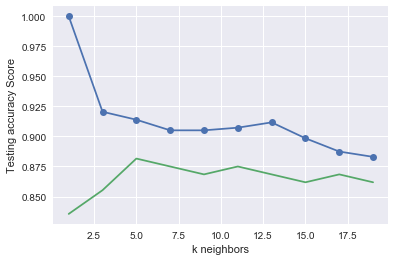

In [36]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_knn, y_train_knn)
    train_score = knn.score(X_train_scaled_knn, y_train_knn)
    test_score = knn.score(X_test_scaled_knn, y_test_knn)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()